**In this file we used Autoencoders and trained the encoded data with Alexnet**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import Sequence
from random import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/Post-hurricane.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_another/no_damage/-95.647227_29.836576.jpeg  
  inflating: train_another/no_damage/-95.647465_29.833225.jpeg  
  inflating: train_another/no_damage/-95.647467_29.832897999999997.jpeg  
  inflating: train_another/no_damage/-95.647548_29.840203000000002.jpeg  
  inflating: train_another/no_damage/-95.647552_29.838818.jpeg  
  inflating: train_another/no_damage/-95.647554_29.839122999999997.jpeg  
  inflating: train_another/no_damage/-95.647554_29.839263.jpeg  
  inflating: train_another/no_damage/-95.647575_29.838532.jpeg  
  inflating: train_another/no_damage/-95.647581_29.838371999999996.jpeg  
  inflating: train_another/no_damage/-95.647581_29.839594.jpeg  
  inflating: train_another/no_damage/-95.647723_29.837940000000003.jpeg  
  inflating: train_another/no_damage/-95.647935_29.838508.jpeg  
  inflating: train_another/no_damage/-95.647935_29.839290999999996.jpeg  
  inflating: train_another/no_damage/-95.647951_29

#**Demensionality reduction using autoencoder**

**Train Images**

In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/train_another

/content/gdrive/MyDrive/univ.ai2_project/train_another


In [ ]:
os.listdir()

['.DS_Store', 'damage', 'no_damage']

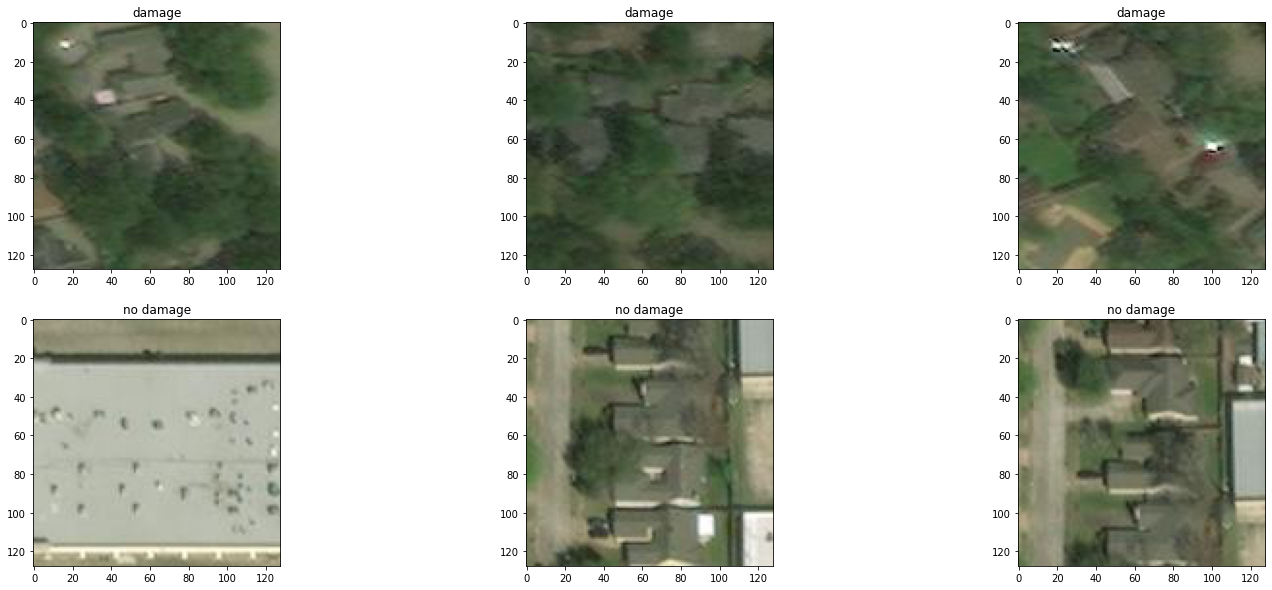

In [ ]:
# ploting train data 
import os

display=[]
for i in ['damage','no_damage']:
    for j in os.listdir(os.path.join(os.getcwd(),i))[:3]:
      images=[]

      image=tf.keras.utils.img_to_array(tf.keras.utils.load_img(os.path.join(os.getcwd(),i,j))).astype('float')*1/255

      display.append(image)

fig,ax=plt.subplots(2,3,figsize=(25,10))

for i,actual_imgs in enumerate([display[:3],display[3:]]):
  for j , img in enumerate(actual_imgs):
      ax[i,j].imshow(img)
      if i==0:
        ax[i,j].set_title("damage")
      else:
        ax[i,j].set_title("no damage")
plt.show()


**Data pipelines**

In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/train_another

/content/gdrive/MyDrive/univ.ai2_project/train_another


In [ ]:
#loading paths of train_another dataset
from tqdm import tqdm
import os
paths=[]
for i in os.listdir()[:2]:
  if i =='no_damage' or i=='damage':
    for j in tqdm(os.listdir(os.path.join(os.getcwd(),i))):

      paths.append([os.path.join(os.getcwd(),i,j),i])

train_path_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels'])
train_path_dataframe.head()

100%|██████████| 5000/5000 [00:00<00:00, 224705.29it/s]


,id,labels
0,/content/gdrive/MyDrive/univ.ai2_project/train...,damage
1,/content/gdrive/MyDrive/univ.ai2_project/train...,damage
2,/content/gdrive/MyDrive/univ.ai2_project/train...,damage
3,/content/gdrive/MyDrive/univ.ai2_project/train...,damage
4,/content/gdrive/MyDrive/univ.ai2_project/train...,damage


In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/validation_another

/content/gdrive/MyDrive/univ.ai2_project/validation_another


In [ ]:
#loading paths of validation_another dataset
paths=[]
for i in os.listdir()[:2]:
   if i =='no_damage' or i=='damage':
    for j in tqdm(os.listdir(os.path.join(os.getcwd(),i))):

      paths.append([os.path.join(os.getcwd(),i,j),i])

validation_path_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels'])
validation_path_dataframe.head()

100%|██████████| 1000/1000 [00:00<00:00, 167150.36it/s]


,id,labels
0,/content/gdrive/MyDrive/univ.ai2_project/valid...,damage
1,/content/gdrive/MyDrive/univ.ai2_project/valid...,damage
2,/content/gdrive/MyDrive/univ.ai2_project/valid...,damage
3,/content/gdrive/MyDrive/univ.ai2_project/valid...,damage
4,/content/gdrive/MyDrive/univ.ai2_project/valid...,damage


In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/test_another

/content/gdrive/MyDrive/univ.ai2_project/test_another


In [ ]:
#loading paths of test_another dataset
paths=[]
for i in os.listdir()[:2]:
  if i =='no_damage' or i=='damage':
    for j in tqdm(os.listdir(os.path.join(os.getcwd(),i))):

      paths.append([os.path.join(os.getcwd(),i,j),i])

test_path_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels'])
test_path_dataframe.head()

100%|██████████| 1000/1000 [00:00<00:00, 127727.15it/s]


,id,labels
0,/content/gdrive/MyDrive/univ.ai2_project/test_...,damage
1,/content/gdrive/MyDrive/univ.ai2_project/test_...,damage
2,/content/gdrive/MyDrive/univ.ai2_project/test_...,damage
3,/content/gdrive/MyDrive/univ.ai2_project/test_...,damage
4,/content/gdrive/MyDrive/univ.ai2_project/test_...,damage


In [ ]:

# size of datasets 
print(" length of train data =",len(train_path_dataframe))
print(" length of test data =",len(test_path_dataframe))
print(" length of validation data =",len(validation_path_dataframe))

 length of train data = 5000
 length of test data = 8728
 length of validation data = 2000


**Autoencoder for Feature extraction ( dimensionality reduction)**

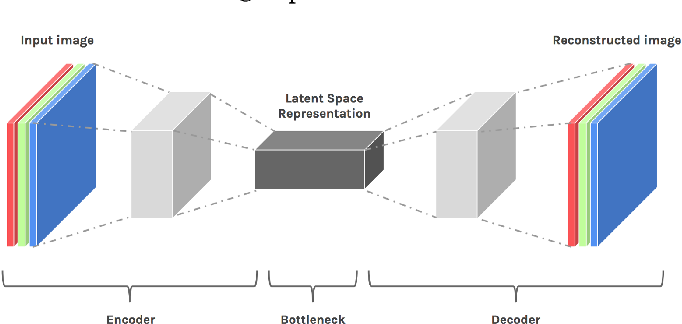


In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/train_another

/content/gdrive/MyDrive/univ.ai2_project/train_another


**Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

tf.keras.backend.clear_session()
input_img = Input(shape=(128, 128, 3))  


#encoder

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(input_img)

#x=MaxPooling2D(pool_size=(2,2),padding='same')(x)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)

#x=MaxPooling2D(pool_size=(2,2),padding='same')(x)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)


#x=MaxPooling2D(pool_size=(2,2),padding='same')(x)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)
x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)
x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)


x=MaxPooling2D(pool_size=(2,2),padding='same')(x)

encoder=Conv2D(1,(1,1),activation='relu',padding='same')(x)

#decoder

x=UpSampling2D((2,2))(encoder)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)
x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)
x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)

#x=UpSampling2D((2,2))(x)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)
x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)

#x=UpSampling2D((2,2))(x)
#x=UpSampling2D((2,2))(x)

x=Conv2D(32,kernel_size=(2,2),activation='relu',padding='same')(x)

decoder=Conv2D(3,kernel_size=(1,1),activation='relu',padding='same')(x)

model=Model(input_img,decoder)
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255,rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
    train_path_dataframe, directory=None, x_col='id', y_col='labels',
    weight_col=None, target_size=(128, 128), color_mode='rgb',
     class_mode='input', batch_size=50, shuffle=True,
    seed=None, save_to_dir=None, interpolation='nearest')

validation_generator=train_generator=datagen.flow_from_dataframe(
    validation_path_dataframe, directory=None, x_col='id', y_col='labels',
    weight_col=None, target_size=(128, 128), color_mode='rgb',
     class_mode='input', batch_size=50, shuffle=True,
    seed=None, save_to_dir=None, interpolation='nearest')

Found 5000 validated image filenames.
Found 2000 validated image filenames.


In [ ]:
#callbacks
import datetime

filepath= os.path.join("64",datetime.datetime.now().strftime("%D%M%Y-%H%M%S"),'logs')

ModelCheckPoint=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None
)
def schedule(epoch,lr):
  if (epoch+1)%3==0:
    return 0.95*lr
  else:
    return lr

Lrdecay = tf.keras.callbacks.LearningRateScheduler(schedule)


earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6)

**Training Autoencoder**

In [ ]:
AutoEncoder_histroy=model.fit(train_generator,epochs=32,steps_per_epoch=40,validation_data=validation_generator,callbacks=[earlystopping,ModelCheckPoint,Lrdecay])

Epoch 1/32
 9/40 [=====>........................] - ETA: 8:12 - loss: 0.1250 - mse: 0.1250

**Save model weights**

In [ ]:
model.save("autoencoder64.h5")

In [ ]:
cd /content/gdrive/MyDrive/univ.ai2_project/

/content/gdrive/MyDrive/univ.ai2_project


In [ ]:
model.load_weights("autoencoder_MM.h5")

**Autoencoder Performance**

**Evaluating model (Autoencoder)**

In [ ]:
#evaluating the model
test_generator=datagen.flow_from_dataframe(
    test_path_dataframe, directory=None, x_col='id', y_col='labels',
    weight_col=None, target_size=(128, 128), color_mode='rgb',
     class_mode='input', batch_size=50, shuffle=True,
    seed=None, save_to_dir=None, interpolation='nearest')
model.evaluate(test_generator)

Found 8728 validated image filenames.
  1/175 [..............................] - ETA: 7:18 - loss: 6.5895e-04 - mse: 6.5895e-04

KeyboardInterrupt: ignored

**Model Outputs**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


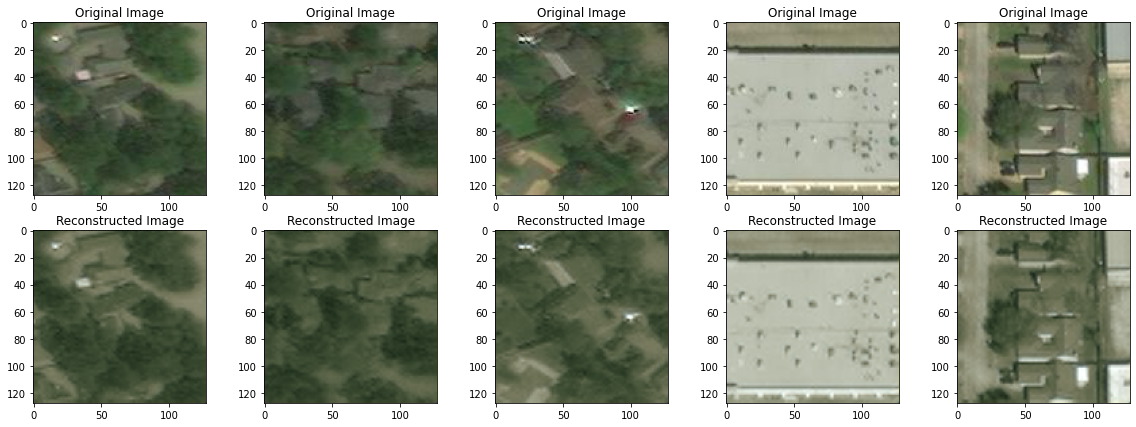

In [ ]:
predicted_display=[model.predict(np.array([i]))[0,:,:,:] for i in display[:5]]
fig,ax=plt.subplots(2,5,figsize=(20,7))
for i,actual_imgs in enumerate([display[:5],predicted_display]):
  for j , img in enumerate(actual_imgs):
      ax[i,j].imshow(img)
      if i==0:
        ax[i,j].set_title("Original Image")
      else:
        ax[i,j].set_title("Reconstructed Image")

**Encoded Features**

In [ ]:
display[0].shape

(128, 128, 3)

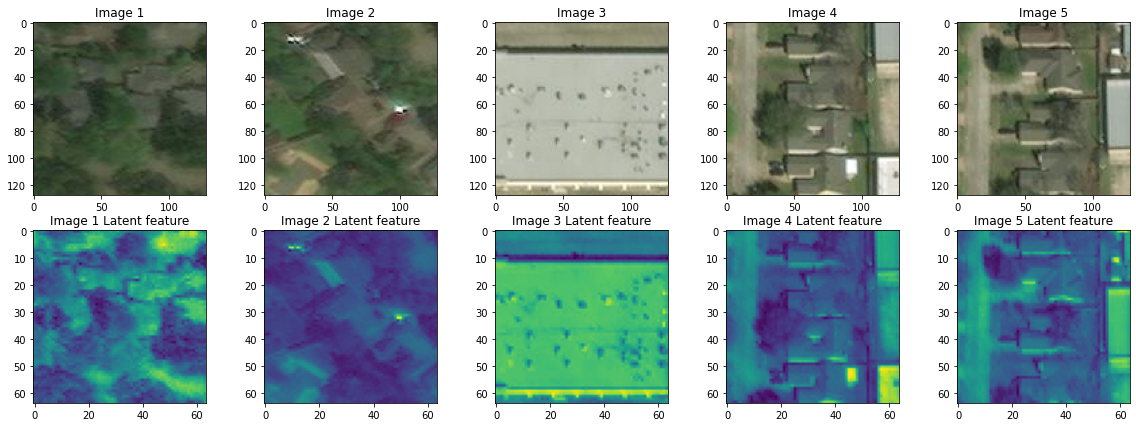

In [ ]:
#Latent Features
encoder_features=Model(input_img , encoder)

predicted_display=[encoder_features.predict(np.array([i])).reshape(64,64) for i in display[-5:]]
fig,ax=plt.subplots(2,5,figsize=(20,7))
for i,actual_imgs in enumerate([display[-5:],predicted_display]):
  for j , img in enumerate(actual_imgs):
      ax[i,j].imshow(img)
      if i==0:
        ax[i,j].set_title("Image "+str(j+1))
      else:
        ax[i,j].set_title("Image "+str(j+1)+" Latent feature")


#**AlexNet Model to be trained with encoded data**

In [ ]:
#Alex Net

![image.png](
  
)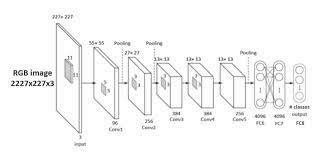

**Model evaluation (unbalanced)**

**Preparing encoded train and validation data**

In [ ]:
#creating enocoded train data

def encode_data(path):
  
  class_labels=[]
  encoded_imgs=[]
  paths=[]
  for i in os.listdir(path):
    print(i)
    if i =='damage' :
      for j in tqdm(os.listdir(os.path.join(path,i))):

        paths.append([os.path.join(path,i,j),i])
  
  train_sub1_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels'])

  paths=[]
  for i in os.listdir(path):
    print(i)
    if i=='no_damage':
      for j in tqdm(os.listdir(os.path.join(path,i))):

        paths.append([os.path.join(path,i,j),i])

  train_sub2_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels'])
 
  
  for num,i in enumerate([train_sub1_dataframe,train_sub2_dataframe]):

    datagen = ImageDataGenerator(rescale=1/255,rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    
    train_generator=datagen.flow_from_dataframe(
    i, directory=None, x_col='id', y_col='labels',rescale=1/255,
    weight_col=None, target_size=(128, 128), color_mode='rgb',
     class_mode='input', batch_size=50, shuffle=True,
    seed=None, save_to_dir=None, interpolation='nearest')
    
    sub_dir_imgs=encoder_features.predict(train_generator)
    encoded_imgs.append(sub_dir_imgs) 
    
    if num==0:
      sub_dir_labels=np.ones(len(i)).tolist()
      class_labels.extend(sub_dir_labels)
    else:
      sub_dir_labels=np.zeros(len(i)).tolist()
      class_labels.extend(sub_dir_labels)

  return np.concatenate((encoded_imgs[0],encoded_imgs[1])),class_labels


**Train data**

In [ ]:
train_encoded_features , train_encoded_labels= encode_data("/content/gdrive/MyDrive/univ.ai2_project/train_another/")

.DS_Store
damage


100%|██████████| 5000/5000 [00:00<00:00, 152301.94it/s]

no_damage


autoencoder64.h5
.DS_Store
damage
no_damage


100%|██████████| 5000/5000 [00:00<00:00, 120922.80it/s]


autoencoder64.h5
Found 5000 validated image filenames.
Found 5000 validated image filenames.


In [ ]:
train_encoded_features.shape,len(train_encoded_labels)

((10000, 64, 64, 1), 10000)

**Validation data**

In [ ]:
valid_encoded_features , valid_encoded_labels= encode_data("/content/gdrive/MyDrive/univ.ai2_project/validation_another")

damage


100%|██████████| 1000/1000 [00:00<00:00, 331827.85it/s]


no_damage
damage
no_damage


100%|██████████| 1000/1000 [00:00<00:00, 308631.64it/s]


Found 1000 validated image filenames.
Found 1000 validated image filenames.


In [ ]:
valid_encoded_features.shape ,len(valid_encoded_labels)

((2000, 64, 64, 1), 2000)

**data pipelines**

In [ ]:
datagen=ImageDataGenerator(rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

latent_generator=datagen.flow(x=train_encoded_features,y=np.array(train_encoded_labels).reshape(-1,1),batch_size=32,shuffle=True)
valid_latent_gen=datagen.flow(x=valid_encoded_features,y=np.array(valid_encoded_labels).reshape(-1,1),batch_size=32,shuffle=True)

earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15)

filepath= os.path.join(datetime.datetime.now().strftime("%D%M%Y-%H%M%S"),'logs')

ModelCheckPoint2=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
    options=None
)

**Model building AlexNet**

In [ ]:
model_alex_net = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model_alex_net.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall']
)

In [ ]:
model_alex_net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 14, 14, 96)        11712     
                                                                 
 batch_normalization_20 (Bat  (None, 14, 14, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        153664    
                                                                 
 batch_normalization_21 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
checkpoint = keras.callbacks.ModelCheckpoint('Alex_model_autoencoders{epoch:08d}.h5',save_freq=5) 

history2 = model_alex_net.fit(latent_generator,epochs=30,validation_data=valid_latent_gen,callbacks=[callback,checkpoint])

Epoch 1/30
313/313 [==============================] - 499s 2s/step - loss: 1.1381 - accuracy: 0.5602 - recall: 0.5486 - val_loss: 0.9101 - val_accuracy: 0.5000 - val_recall: 1.0000
Epoch 2/30
313/313 [==============================] - 489s 2s/step - loss: 0.8714 - accuracy: 0.6261 - recall: 0.6206 - val_loss: 0.7020 - val_accuracy: 0.5870 - val_recall: 0.9400
Epoch 3/30
313/313 [==============================] - 490s 2s/step - loss: 0.7571 - accuracy: 0.6545 - recall: 0.6586 - val_loss: 0.5073 - val_accuracy: 0.7665 - val_recall: 0.7800
Epoch 4/30
313/313 [==============================] - 488s 2s/step - loss: 0.6921 - accuracy: 0.6812 - recall: 0.6822 - val_loss: 0.4770 - val_accuracy: 0.7735 - val_recall: 0.7870
Epoch 5/30
313/313 [==============================] - 485s 2s/step - loss: 0.6516 - accuracy: 0.7026 - recall: 0.7102 - val_loss: 0.4848 - val_accuracy: 0.7730 - val_recall: 0.8080
Epoch 6/30
313/313 [==============================] - 489s 2s/step - loss: 0.6257 - accuracy: 0

In [ ]:
# serialize model to JSON
model_json = model_alex_net.to_json()
with open("alex_net_autoencoders.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_alex_net.save_weights("alex_net_autoencoders2.0.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_alex_net.load_weights("alex_net_autoencoders2.0.h5")

**Test data**

In [ ]:
test_encoded_features , test_encoded_labels= encode_data("/content/gdrive/MyDrive/univ.ai2_project/test")

.DS_Store
damage


100%|██████████| 1000/1000 [00:00<00:00, 61561.44it/s]


no_damage
.DS_Store
damage
no_damage


100%|██████████| 1000/1000 [00:00<00:00, 197760.57it/s]


Found 1000 validated image filenames.
Found 1000 validated image filenames.


In [ ]:
test_latent_generator=datagen.flow(x=test_encoded_features,y=np.array(test_encoded_labels).reshape(-1,1),batch_size=32)



**Model evaluation (Balanced Test Data)**

In [ ]:
model_alex_net.evaluate(test_latent_generator)

63/63 [==============================] - 17s 272ms/step - loss: 0.3822 - accuracy: 0.8980 - recall: 0.8600


[0.38218623399734497, 0.898000009059906, 0.8600000143051147]

**Test data encoding (unbalanced)**

In [ ]:
test_encoded_featuresB , test_encoded_labelsB= encode_data("/content/gdrive/MyDrive/univ.ai2_project/test_another/")

**Model evaluation (unbalanced)**

In [ ]:
test_latent_generatorB=datagen.flow(x=test_encoded_featuresB,yB=np.array(test_encoded_labelsB).reshape(-1,1),batch_size=32)

In [ ]:
y=np.array(test_encoded_labels).reshape(-1,1)

In [ ]:
model_alex_net.evaluate(test_latent_generatorB)

63/63 [==============================] - 20s 310ms/step - loss: 0.3883 - accuracy: 0.8860 - recall: 0.8480


[0.38825908303260803, 0.8859999752044678, 0.8479999899864197]

Model Scorecard

In [3]:
from prettytable import PrettyTable

table=PrettyTable(["model", "Train_accuracy","validation_accuracy", "Test_accuracy","Test_accuracy on unbalanced data" ])
table.add_row(["autoencoder + AlexNet model","0.82 ",'0.83','0.89','0.88'])
print(table)

+-----------------------------+----------------+---------------------+---------------+----------------------------------+
|            model            | Train_accuracy | validation_accuracy | Test_accuracy | Test_accuracy on unbalanced data |
+-----------------------------+----------------+---------------------+---------------+----------------------------------+
| autoencoder + AlexNet model |     0.82       |         0.83        |      0.89     |               0.88               |
+-----------------------------+----------------+---------------------+---------------+----------------------------------+
